In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
import os

In [2]:
import tensorflow as tf
import numpy as np

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
tf.__version__

'1.5.0'

In [4]:
image_path = ["00003102d3ec9a46cb5cd2fd95473b8d.jpg"]
#image_path += glob("imgs/*")

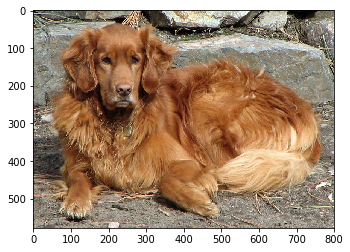

In [5]:
from PIL import Image
plt.imshow(Image.open(image_path[0]))

In [6]:
ResNet50 = tf.keras.applications.ResNet50
preprocess_input = tf.keras.applications.resnet50.preprocess_input
image = tf.keras.preprocessing.image

In [7]:
resnet_model = ResNet50(weights='imagenet', include_top=False)

In [8]:
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return resnet_model.predict(x)[0][0][0]

In [9]:
size = 256

In [10]:
f = []
images = []
test_f = []
test_images = []
c = 10000
t = 0
for i in image_path:
    try:
        feat = extract_features(i)
        img = image.img_to_array(image.load_img(i, target_size=(size, size)))

        if t > 0:
            test_f.append(feat)
            test_images.append(img)
            t -= 1
            continue
        if c > 0:
            f.append(feat)
            images.append(img)
            c -= 1
            continue
        if t == 0:
            break
    except:
        pass
images = np.reshape(images, (len(images), size, size, 3)).astype('float32') / 255.
test_images = np.reshape(test_images, (len(test_images), size, size, 3)).astype('float32') / 255.

In [11]:
print(len(images), len(test_images))

(1, 0)


In [12]:
small_out = image.load_img(image_path[0], target_size=(size, size))

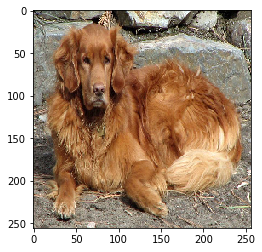

In [13]:
plt.imshow(small_out)

In [14]:
Input = tf.keras.layers.Input
Dense = tf.keras.layers.Dense
Conv2D = tf.keras.layers.Conv2D
MaxPooling2D = tf.keras.layers.MaxPooling2D
UpSampling2D = tf.keras.layers.UpSampling2D
Cropping2D = tf.keras.layers.Cropping2D
Conv2DTranspose = tf.keras.layers.Conv2DTranspose
BatchNormalization = tf.keras.layers.BatchNormalization
LeakyReLU = tf.keras.layers.LeakyReLU
Model = tf.keras.models.Model
Reshape = tf.keras.layers.Reshape
Adam = tf.keras.optimizers.Adam
#from tf.keras import backend as K

In [15]:
def conv_only():
    input_img = Input(shape=(2048, ))  # adapt this if using `channels_first` image data format

    x = Reshape([4, 4, 128] )(input_img)
    x = Conv2DTranspose(2048, (4, 4), activation='relu', padding='same', strides=(2, 2))(x)
    #x = Cropping2D(((1, 1), (1, 1)))(x)
    #x = BatchNormalization()(x)
    x = Conv2DTranspose(1024, (4, 4), activation='relu', padding='same', strides=(2, 2))(x)
    #x = Cropping2D(((1, 1), (1, 1)))(x)
    #x = BatchNormalization()(x)
    x = Conv2DTranspose(512, (4, 4), activation='relu', padding='same', strides=(2, 2))(x)
    #x = Cropping2D(((1, 1), (1, 1)))(x)
    #x = BatchNormalization()(x)
    x = Conv2DTranspose(256, (4, 4), activation='relu', padding='same', strides=(2, 2))(x)
    #x = Cropping2D(((1, 1), (1, 1)))(x)
    #x = BatchNormalization()(x)
    x = Conv2DTranspose(128, (4, 4), activation='relu', padding='same', strides=(2, 2))(x)
    #x = Cropping2D(((1, 1), (1, 1)))(x)
    #x = BatchNormalization()(x)
    x = Conv2DTranspose(64, (4, 4), activation='relu', padding='same', strides=(2, 2))(x)
    #x = Cropping2D(((1, 1), (1, 1)))(x)
    #x = BatchNormalization()(x)
    decoded = Conv2D(3, (4, 4), activation='sigmoid', padding='same')(x)

In [16]:
conv_size = (3, 3)
leaku_relu_alpha = 0.2

input_img = Input(shape=(2048, )) 
x = Reshape([4, 4, 128] )(input_img)
x = Conv2D(2048, conv_size, padding='same')(x) #activation='relu',
x = LeakyReLU(leaku_relu_alpha)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(1024, conv_size, padding='same')(x)
x = LeakyReLU(leaku_relu_alpha)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(512, conv_size, padding='same')(x)
x = LeakyReLU(leaku_relu_alpha)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(256, conv_size, padding='same')(x)
x = LeakyReLU(leaku_relu_alpha)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, conv_size, padding='same')(x)
x = LeakyReLU(leaku_relu_alpha)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, conv_size, padding='same')(x)
x = LeakyReLU(leaku_relu_alpha)(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (2, 2), activation='sigmoid', padding='same')(x)
#decoded = Conv2D(3, (2, 2), activation='tanh', padding='same')(x)

In [17]:
autoencoder = Model(input_img, decoded)
#optimizer = Adam(lr=0.001)  # lr=1e-3
#autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.compile(optimizer="adadelta", loss='binary_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [18]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2048)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 2048)        2361344   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 4, 4, 2048)        0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 8, 8, 2048)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 1024)        18875392  
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 1024)        0         
__________

Epoch 1/1
1/1 [==============================]1/1 [==============================] - 0s 80ms/step - loss: 0.6737



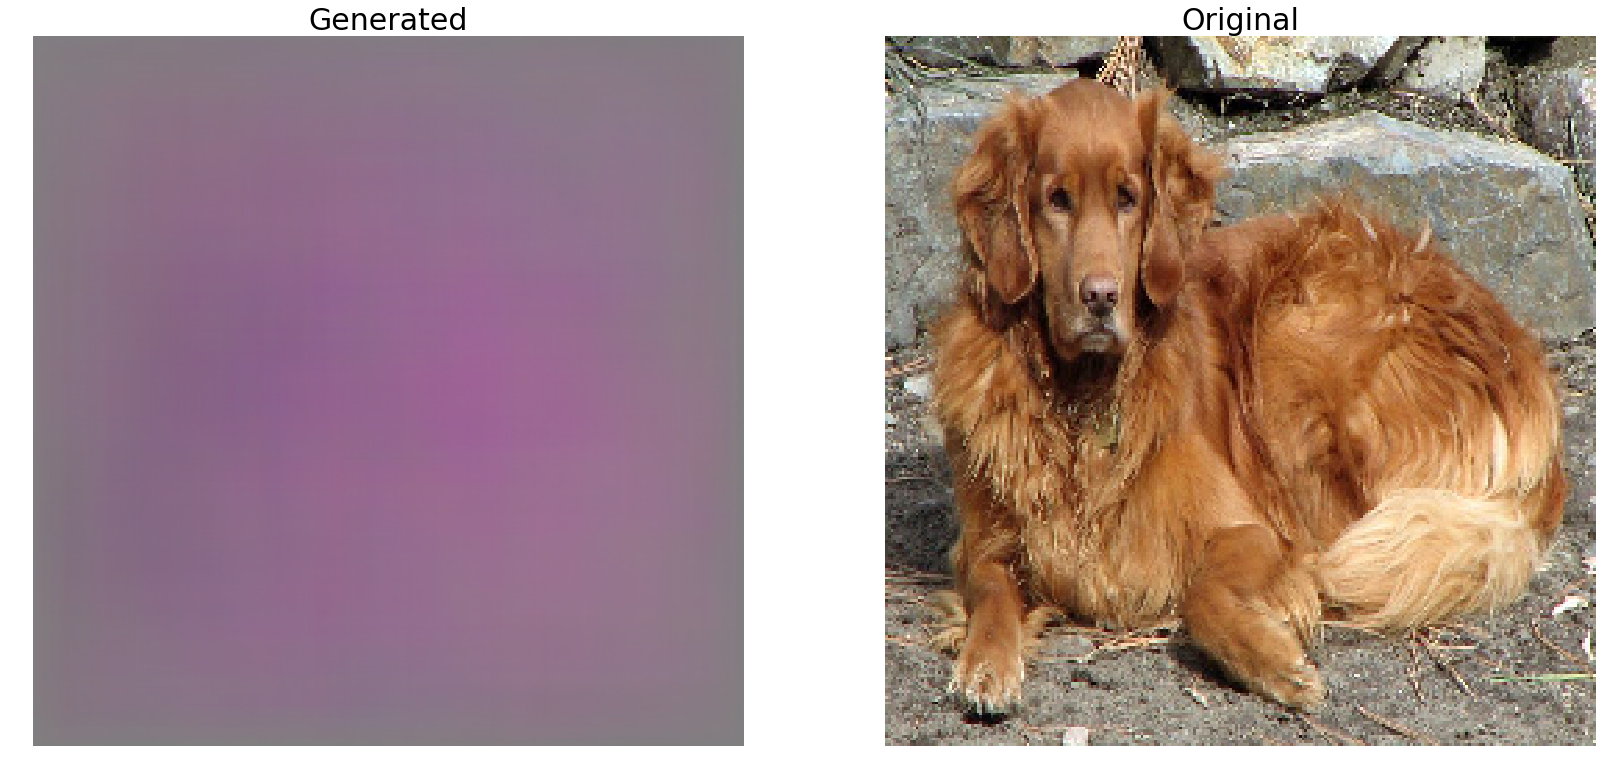

Epoch 1/9
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6934

Epoch 2/9
1/1 [==============================]1/1 [==============================] - 0s 88ms/step - loss: 0.6739

Epoch 3/9
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6634

Epoch 4/9
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6759

Epoch 5/9
1/1 [==============================]1/1 [==============================] - 0s 76ms/step - loss: 0.6594

Epoch 6/9
1/1 [==============================]1/1 [==============================] - 0s 78ms/step - loss: 0.6529

Epoch 7/9
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6532

Epoch 8/9
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6536

Epoch 9/9
1/1 [==============================]1/1 [==============================] - 0s 

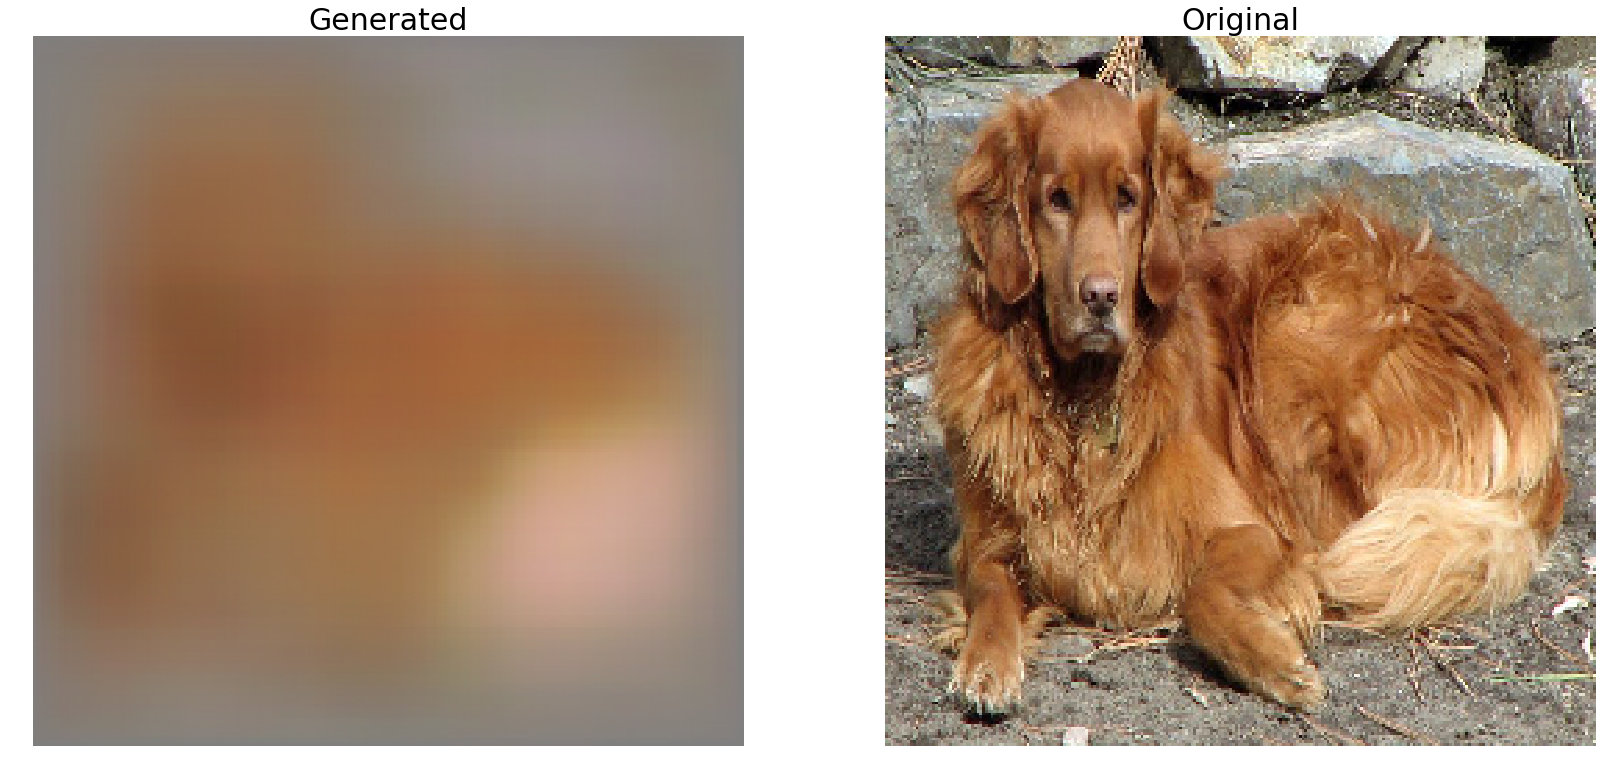

Epoch 1/40
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6495

Epoch 2/40
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6515

Epoch 3/40
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6665

Epoch 4/40
1/1 [==============================]1/1 [==============================] - 0s 68ms/step - loss: 0.6507

Epoch 5/40
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6461

Epoch 6/40
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6447

Epoch 7/40
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6439

Epoch 8/40
1/1 [==============================]1/1 [==============================] - 0s 67ms/step - loss: 0.6436

Epoch 9/40
1/1 [==============================]1/1 [============================

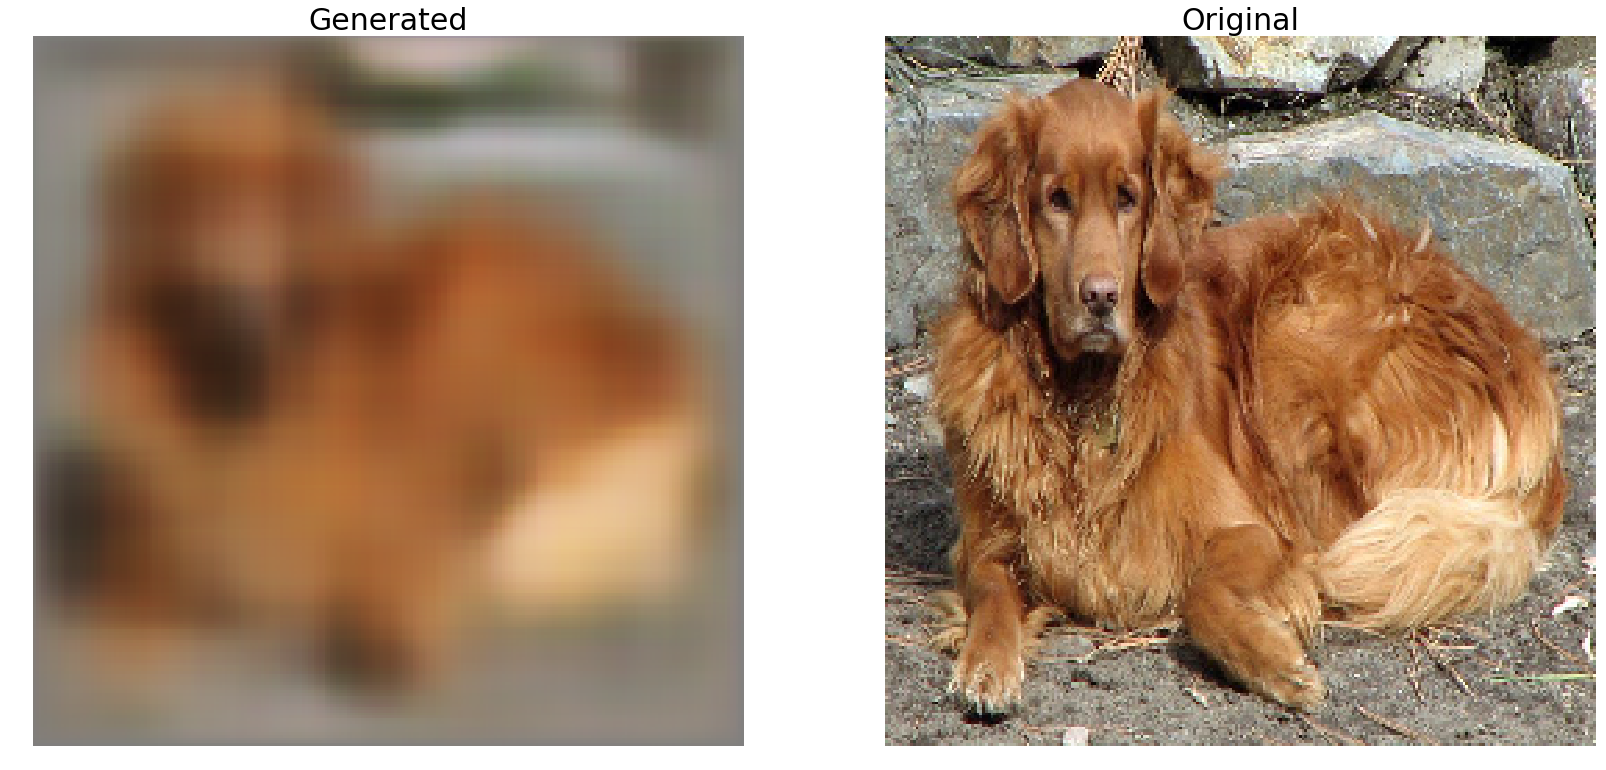

Epoch 1/50
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6325

Epoch 2/50
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6325

Epoch 3/50
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6325

Epoch 4/50
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6339

Epoch 5/50
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6331

Epoch 6/50
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6339

Epoch 7/50
1/1 [==============================]1/1 [==============================] - 0s 76ms/step - loss: 0.6312

Epoch 8/50
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6316

Epoch 9/50
1/1 [==============================]1/1 [============================

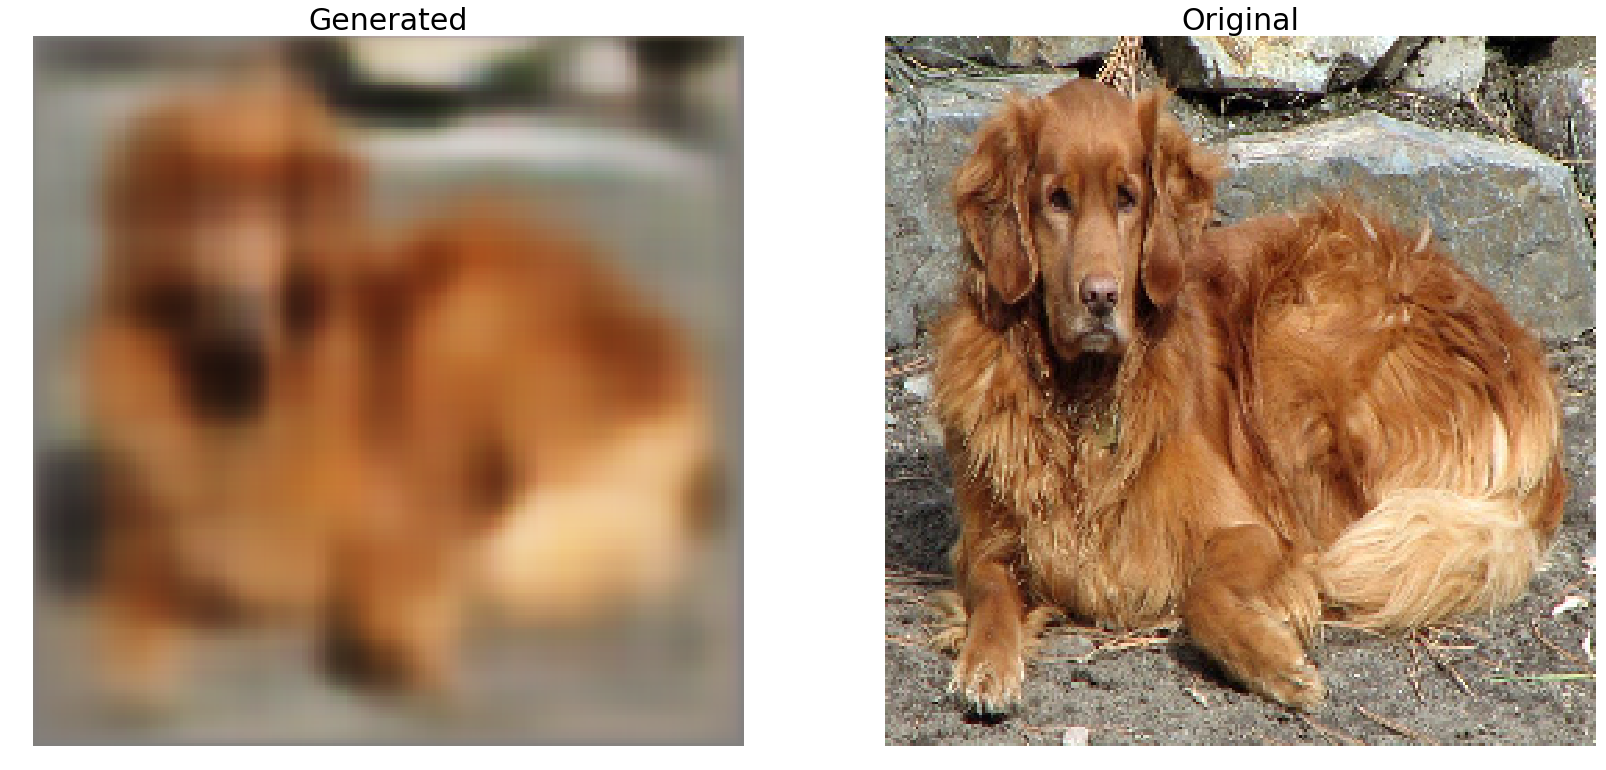

Epoch 1/400
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6242

Epoch 2/400
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6246

Epoch 3/400
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6238

Epoch 4/400
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6243

Epoch 5/400
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6239

Epoch 6/400
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6246

Epoch 7/400
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6243

Epoch 8/400
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6248

Epoch 9/400
1/1 [==============================]1/1 [===================

1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6194

Epoch 72/400
1/1 [==============================]1/1 [==============================] - 0s 76ms/step - loss: 0.6191

Epoch 73/400
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6191

Epoch 74/400
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6190

Epoch 75/400
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6191

Epoch 76/400
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6191

Epoch 77/400
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6192

Epoch 78/400
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6194

Epoch 79/400
1/1 [==============================]1/1 [=======================


Epoch 141/400
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6169

Epoch 142/400
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6170

Epoch 143/400
1/1 [==============================]1/1 [==============================] - 0s 78ms/step - loss: 0.6171

Epoch 144/400
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6173

Epoch 145/400
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6174

Epoch 146/400
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6176

Epoch 147/400
1/1 [==============================]1/1 [==============================] - 0s 78ms/step - loss: 0.6175

Epoch 148/400
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6179

Epoch 149/400
1/1 [==============================]1/1 [


Epoch 211/400
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6157

Epoch 212/400
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6159

Epoch 213/400
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6159

Epoch 214/400
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6161

Epoch 215/400
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6161

Epoch 216/400
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6163

Epoch 217/400
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6160

Epoch 218/400
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6161

Epoch 219/400
1/1 [==============================]1/1 [


Epoch 281/400
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6149

Epoch 282/400
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6152

Epoch 283/400
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6149

Epoch 284/400
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6151

Epoch 285/400
1/1 [==============================]1/1 [==============================] - 0s 66ms/step - loss: 0.6147

Epoch 286/400
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6149

Epoch 287/400
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6145

Epoch 288/400
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6146

Epoch 289/400
1/1 [==============================]1/1 [


Epoch 351/400
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6141

Epoch 352/400
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6139

Epoch 353/400
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6138

Epoch 354/400
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6137

Epoch 355/400
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6136

Epoch 356/400
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6136

Epoch 357/400
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6134

Epoch 358/400
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6136

Epoch 359/400
1/1 [==============================]1/1 [

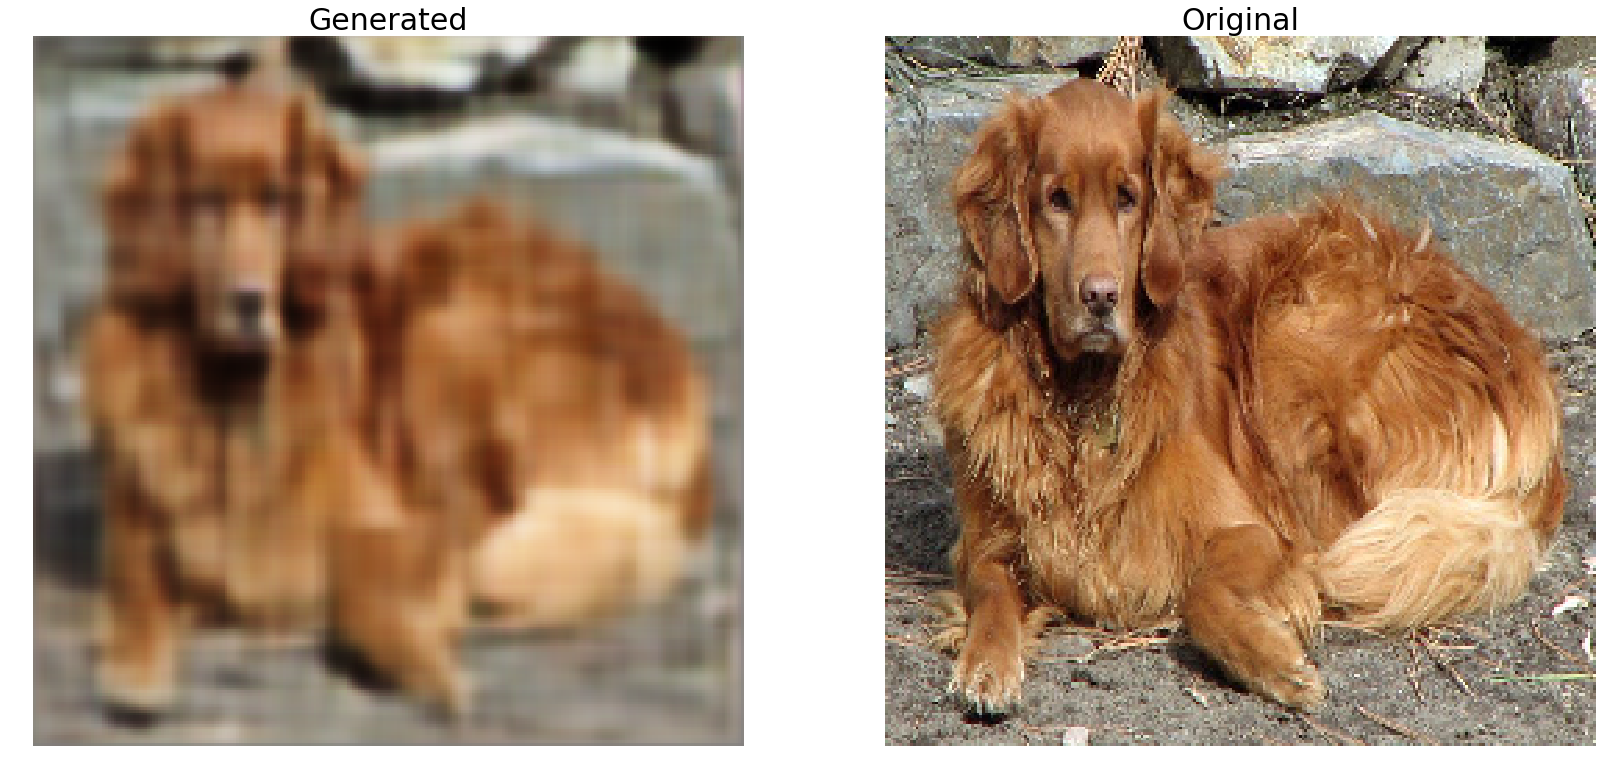

Epoch 1/500
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6133

Epoch 2/500
1/1 [==============================]1/1 [==============================] - 0s 67ms/step - loss: 0.6135

Epoch 3/500
1/1 [==============================]1/1 [==============================] - 0s 75ms/step - loss: 0.6133

Epoch 4/500
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6134

Epoch 5/500
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6132

Epoch 6/500
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6131

Epoch 7/500
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6130

Epoch 8/500
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6129

Epoch 9/500
1/1 [==============================]1/1 [===================

1/1 [==============================]1/1 [==============================] - 0s 66ms/step - loss: 0.6128

Epoch 72/500
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6126

Epoch 73/500
1/1 [==============================]1/1 [==============================] - 0s 76ms/step - loss: 0.6127

Epoch 74/500
1/1 [==============================]1/1 [==============================] - 0s 78ms/step - loss: 0.6125

Epoch 75/500
1/1 [==============================]1/1 [==============================] - 0s 80ms/step - loss: 0.6127

Epoch 76/500
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6124

Epoch 77/500
1/1 [==============================]1/1 [==============================] - 0s 76ms/step - loss: 0.6125

Epoch 78/500
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6122

Epoch 79/500
1/1 [==============================]1/1 [=======================


Epoch 141/500
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6121

Epoch 142/500
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6119

Epoch 143/500
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6120

Epoch 144/500
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6117

Epoch 145/500
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6118

Epoch 146/500
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6116

Epoch 147/500
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6117

Epoch 148/500
1/1 [==============================]1/1 [==============================] - 0s 78ms/step - loss: 0.6116

Epoch 149/500
1/1 [==============================]1/1 [


Epoch 211/500
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6114

Epoch 212/500
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6113

Epoch 213/500
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6113

Epoch 214/500
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6112

Epoch 215/500
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6112

Epoch 216/500
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6112

Epoch 217/500
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6112

Epoch 218/500
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6112

Epoch 219/500
1/1 [==============================]1/1 [


Epoch 281/500
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6106

Epoch 282/500
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6105

Epoch 283/500
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6105

Epoch 284/500
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6106

Epoch 285/500
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6107

Epoch 286/500
1/1 [==============================]1/1 [==============================] - 0s 78ms/step - loss: 0.6109

Epoch 287/500
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6109

Epoch 288/500
1/1 [==============================]1/1 [==============================] - 0s 76ms/step - loss: 0.6112

Epoch 289/500
1/1 [==============================]1/1 [


Epoch 351/500
1/1 [==============================]1/1 [==============================] - 0s 67ms/step - loss: 0.6101

Epoch 352/500
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6101

Epoch 353/500
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6100

Epoch 354/500
1/1 [==============================]1/1 [==============================] - 0s 78ms/step - loss: 0.6101

Epoch 355/500
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6101

Epoch 356/500
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6103

Epoch 357/500
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6102

Epoch 358/500
1/1 [==============================]1/1 [==============================] - 0s 79ms/step - loss: 0.6106

Epoch 359/500
1/1 [==============================]1/1 [


Epoch 421/500
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6096

Epoch 422/500
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6095

Epoch 423/500
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6096

Epoch 424/500
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6095

Epoch 425/500
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6096

Epoch 426/500
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6097

Epoch 427/500
1/1 [==============================]1/1 [==============================] - 0s 76ms/step - loss: 0.6098

Epoch 428/500
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6100

Epoch 429/500
1/1 [==============================]1/1 [


Epoch 491/500
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6095

Epoch 492/500
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6092

Epoch 493/500
1/1 [==============================]1/1 [==============================] - 0s 76ms/step - loss: 0.6093

Epoch 494/500
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6091

Epoch 495/500
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6091

Epoch 496/500
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6090

Epoch 497/500
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6091

Epoch 498/500
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6091

Epoch 499/500
1/1 [==============================]1/1 [

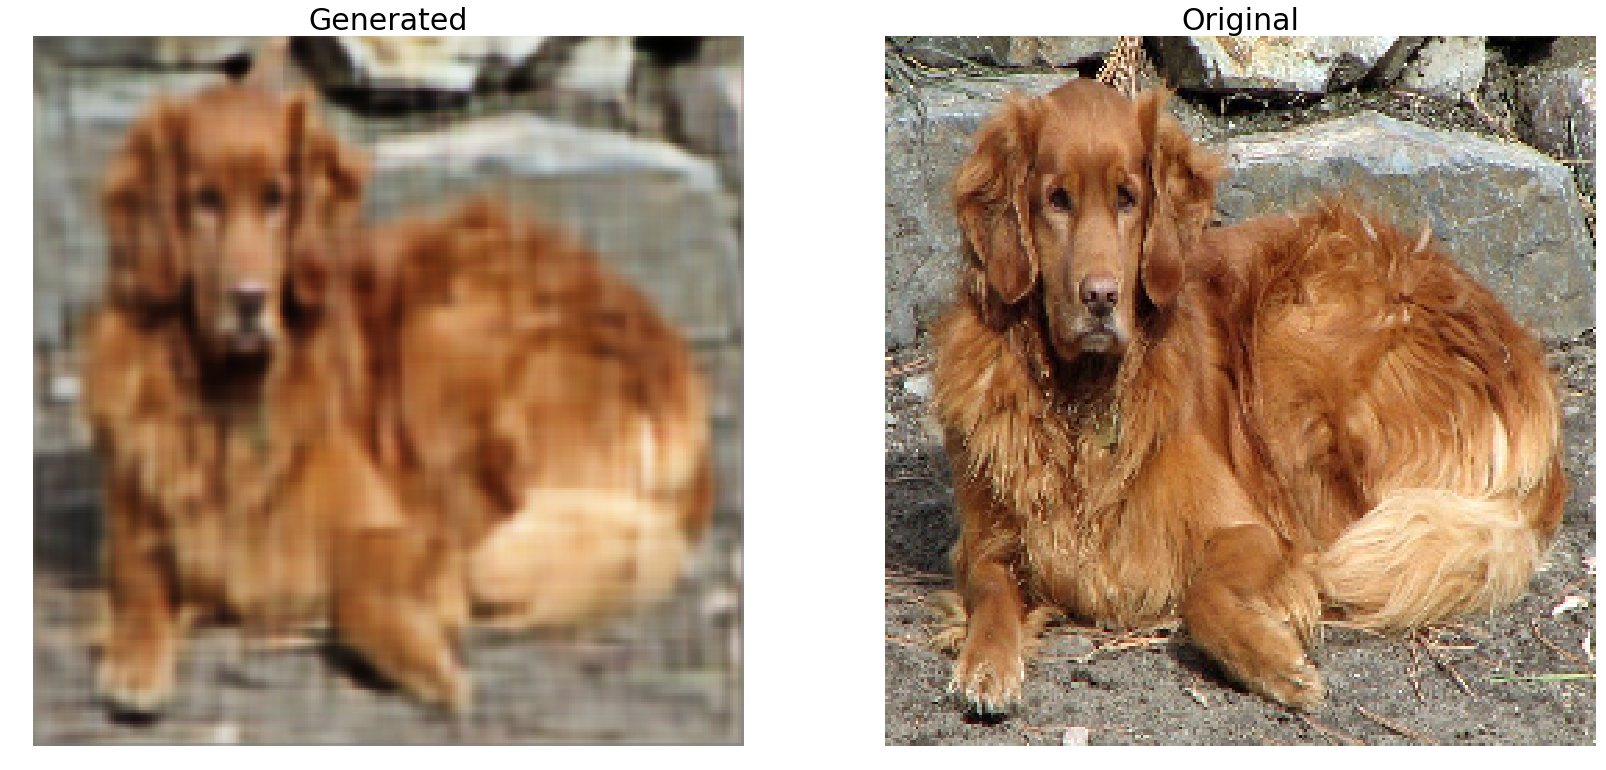

Epoch 1/1000
1/1 [==============================]1/1 [==============================] - 0s 77ms/step - loss: 0.6092

Epoch 2/1000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6093

Epoch 3/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6092

Epoch 4/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6093

Epoch 5/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6092

Epoch 6/1000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6093

Epoch 7/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6092

Epoch 8/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6092

Epoch 9/1000
1/1 [==============================]1/1 [==========


Epoch 71/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6088

Epoch 72/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6087

Epoch 73/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6087

Epoch 74/1000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6087

Epoch 75/1000
1/1 [==============================]1/1 [==============================] - 0s 78ms/step - loss: 0.6087

Epoch 76/1000
1/1 [==============================]1/1 [==============================] - 0s 68ms/step - loss: 0.6088

Epoch 77/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6088

Epoch 78/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6090

Epoch 79/1000
1/1 [==============================]1/1 [

1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6086

Epoch 141/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6087

Epoch 142/1000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6087

Epoch 143/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6088

Epoch 144/1000
1/1 [==============================]1/1 [==============================] - 0s 67ms/step - loss: 0.6087

Epoch 145/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6086

Epoch 146/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6085

Epoch 147/1000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6084

Epoch 148/1000
1/1 [==============================]1/1 [=======


Epoch 209/1000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6082

Epoch 210/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6085

Epoch 211/1000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6084

Epoch 212/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6086

Epoch 213/1000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6085

Epoch 214/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6085

Epoch 215/1000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6083

Epoch 216/1000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6082

Epoch 217/1000
1/1 [===========================


Epoch 278/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6080

Epoch 279/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6081

Epoch 280/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6079

Epoch 281/1000
1/1 [==============================]1/1 [==============================] - 0s 77ms/step - loss: 0.6079

Epoch 282/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6079

Epoch 283/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6078

Epoch 284/1000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6078

Epoch 285/1000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6078

Epoch 286/1000
1/1 [===========================


Epoch 347/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6077

Epoch 348/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6078

Epoch 349/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6077

Epoch 350/1000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6077

Epoch 351/1000
1/1 [==============================]1/1 [==============================] - 0s 75ms/step - loss: 0.6077

Epoch 352/1000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6076

Epoch 353/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6076

Epoch 354/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6075

Epoch 355/1000
1/1 [===========================


Epoch 416/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6071

Epoch 417/1000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6073

Epoch 418/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6072

Epoch 419/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6073

Epoch 420/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6072

Epoch 421/1000
1/1 [==============================]1/1 [==============================] - 0s 68ms/step - loss: 0.6073

Epoch 422/1000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6073

Epoch 423/1000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6073

Epoch 424/1000
1/1 [===========================


Epoch 485/1000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6068

Epoch 486/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6070

Epoch 487/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6070

Epoch 488/1000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6071

Epoch 489/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6071

Epoch 490/1000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6072

Epoch 491/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6071

Epoch 492/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6071

Epoch 493/1000
1/1 [===========================


Epoch 554/1000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6065

Epoch 555/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6065

Epoch 556/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6065

Epoch 557/1000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6066

Epoch 558/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6065

Epoch 559/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6066

Epoch 560/1000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6066

Epoch 561/1000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6067

Epoch 562/1000
1/1 [===========================


Epoch 623/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6065

Epoch 624/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6064

Epoch 625/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6063

Epoch 626/1000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6063

Epoch 627/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6063

Epoch 628/1000
1/1 [==============================]1/1 [==============================] - 0s 76ms/step - loss: 0.6062

Epoch 629/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6062

Epoch 630/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6062

Epoch 631/1000
1/1 [===========================


Epoch 692/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6064

Epoch 693/1000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6063

Epoch 694/1000
1/1 [==============================]1/1 [==============================] - 0s 68ms/step - loss: 0.6063

Epoch 695/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6062

Epoch 696/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6062

Epoch 697/1000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6061

Epoch 698/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6061

Epoch 699/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6060

Epoch 700/1000
1/1 [===========================


Epoch 761/1000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6060

Epoch 762/1000
1/1 [==============================]1/1 [==============================] - 0s 68ms/step - loss: 0.6060

Epoch 763/1000
1/1 [==============================]1/1 [==============================] - 0s 75ms/step - loss: 0.6061

Epoch 764/1000
1/1 [==============================]1/1 [==============================] - 0s 77ms/step - loss: 0.6060

Epoch 765/1000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6061

Epoch 766/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6060

Epoch 767/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6061

Epoch 768/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6060

Epoch 769/1000
1/1 [===========================


Epoch 830/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6058

Epoch 831/1000
1/1 [==============================]1/1 [==============================] - 0s 77ms/step - loss: 0.6058

Epoch 832/1000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6057

Epoch 833/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6057

Epoch 834/1000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6057

Epoch 835/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6057

Epoch 836/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6057

Epoch 837/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6057

Epoch 838/1000
1/1 [===========================


Epoch 899/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6057

Epoch 900/1000
1/1 [==============================]1/1 [==============================] - 0s 75ms/step - loss: 0.6058

Epoch 901/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6057

Epoch 902/1000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6058

Epoch 903/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6057

Epoch 904/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6057

Epoch 905/1000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6056

Epoch 906/1000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6056

Epoch 907/1000
1/1 [===========================


Epoch 968/1000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6055

Epoch 969/1000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6055

Epoch 970/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6055

Epoch 971/1000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6055

Epoch 972/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6054

Epoch 973/1000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6055

Epoch 974/1000
1/1 [==============================]1/1 [==============================] - 0s 76ms/step - loss: 0.6054

Epoch 975/1000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6054

Epoch 976/1000
1/1 [===========================

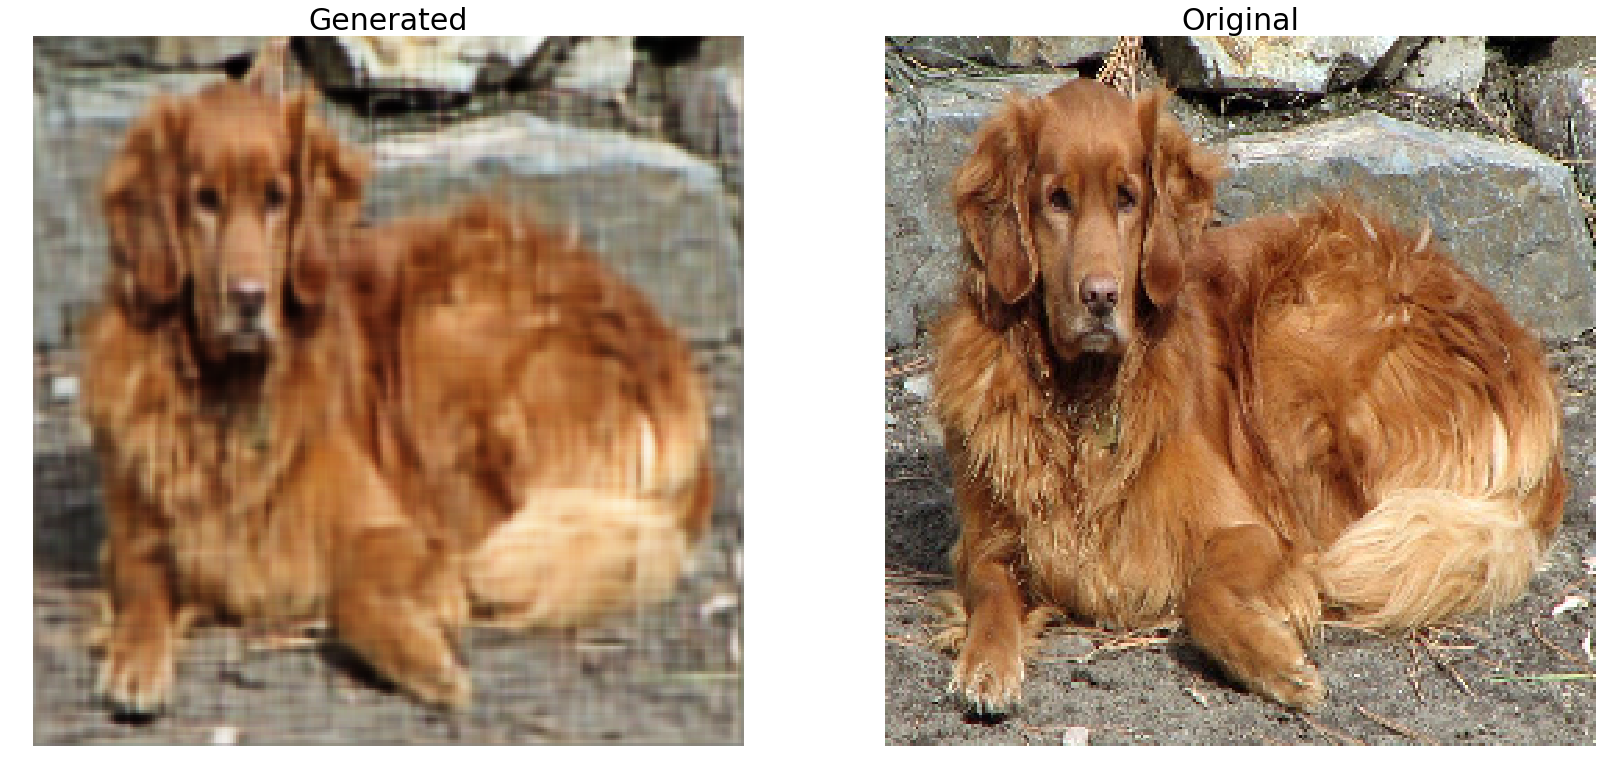

Epoch 1/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6053

Epoch 2/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6053

Epoch 3/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6053

Epoch 4/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6053

Epoch 5/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6054

Epoch 6/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6054

Epoch 7/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6055

Epoch 8/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6053

Epoch 9/2000
1/1 [==============================]1/1 [==========


Epoch 71/2000
1/1 [==============================]1/1 [==============================] - 0s 68ms/step - loss: 0.6051

Epoch 72/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6050

Epoch 73/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6051

Epoch 74/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6050

Epoch 75/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6050

Epoch 76/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6050

Epoch 77/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6051

Epoch 78/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6051

Epoch 79/2000
1/1 [==============================]1/1 [

1/1 [==============================]1/1 [==============================] - 0s 76ms/step - loss: 0.6051

Epoch 141/2000
1/1 [==============================]1/1 [==============================] - 0s 67ms/step - loss: 0.6050

Epoch 142/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6050

Epoch 143/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6049

Epoch 144/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6050

Epoch 145/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6049

Epoch 146/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6050

Epoch 147/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6049

Epoch 148/2000
1/1 [==============================]1/1 [=======


Epoch 209/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6047

Epoch 210/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6047

Epoch 211/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6047

Epoch 212/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6047

Epoch 213/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6047

Epoch 214/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6047

Epoch 215/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6048

Epoch 216/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6047

Epoch 217/2000
1/1 [===========================


Epoch 278/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6047

Epoch 279/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6047

Epoch 280/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6046

Epoch 281/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6047

Epoch 282/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6046

Epoch 283/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6047

Epoch 284/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6046

Epoch 285/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6047

Epoch 286/2000
1/1 [===========================


Epoch 347/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6045

Epoch 348/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6044

Epoch 349/2000
1/1 [==============================]1/1 [==============================] - 0s 76ms/step - loss: 0.6045

Epoch 350/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6044

Epoch 351/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6044

Epoch 352/2000
1/1 [==============================]1/1 [==============================] - 0s 79ms/step - loss: 0.6044

Epoch 353/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6044

Epoch 354/2000
1/1 [==============================]1/1 [==============================] - 0s 76ms/step - loss: 0.6045

Epoch 355/2000
1/1 [===========================


Epoch 416/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6043

Epoch 417/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6043

Epoch 418/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6043

Epoch 419/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6043

Epoch 420/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6042

Epoch 421/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6042

Epoch 422/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6042

Epoch 423/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6042

Epoch 424/2000
1/1 [===========================


Epoch 485/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6042

Epoch 486/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6041

Epoch 487/2000
1/1 [==============================]1/1 [==============================] - 0s 78ms/step - loss: 0.6042

Epoch 488/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6041

Epoch 489/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6041

Epoch 490/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6041

Epoch 491/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6041

Epoch 492/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6041

Epoch 493/2000
1/1 [===========================


Epoch 554/2000
1/1 [==============================]1/1 [==============================] - 0s 68ms/step - loss: 0.6040

Epoch 555/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6040

Epoch 556/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6041

Epoch 557/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6041

Epoch 558/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6041

Epoch 559/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6041

Epoch 560/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6042

Epoch 561/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6041

Epoch 562/2000
1/1 [===========================


Epoch 623/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6039

Epoch 624/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6039

Epoch 625/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6039

Epoch 626/2000
1/1 [==============================]1/1 [==============================] - 0s 68ms/step - loss: 0.6039

Epoch 627/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6039

Epoch 628/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6039

Epoch 629/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6038

Epoch 630/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6038

Epoch 631/2000
1/1 [===========================


Epoch 692/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6037

Epoch 693/2000
1/1 [==============================]1/1 [==============================] - 0s 67ms/step - loss: 0.6037

Epoch 694/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6037

Epoch 695/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6038

Epoch 696/2000
1/1 [==============================]1/1 [==============================] - 0s 76ms/step - loss: 0.6038

Epoch 697/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6038

Epoch 698/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6038

Epoch 699/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6038

Epoch 700/2000
1/1 [===========================


Epoch 761/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6036

Epoch 762/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6037

Epoch 763/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6036

Epoch 764/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6037

Epoch 765/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6036

Epoch 766/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6038

Epoch 767/2000
1/1 [==============================]1/1 [==============================] - 0s 77ms/step - loss: 0.6037

Epoch 768/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6037

Epoch 769/2000
1/1 [===========================


Epoch 830/2000
1/1 [==============================]1/1 [==============================] - 0s 78ms/step - loss: 0.6035

Epoch 831/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6034

Epoch 832/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6035

Epoch 833/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6034

Epoch 834/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6035

Epoch 835/2000
1/1 [==============================]1/1 [==============================] - 0s 75ms/step - loss: 0.6034

Epoch 836/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6035

Epoch 837/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6035

Epoch 838/2000
1/1 [===========================


Epoch 899/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6034

Epoch 900/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6035

Epoch 901/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6034

Epoch 902/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6035

Epoch 903/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6033

Epoch 904/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6034

Epoch 905/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6033

Epoch 906/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6034

Epoch 907/2000
1/1 [===========================


Epoch 968/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6031

Epoch 969/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6031

Epoch 970/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6031

Epoch 971/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6031

Epoch 972/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6031

Epoch 973/2000
1/1 [==============================]1/1 [==============================] - 0s 76ms/step - loss: 0.6031

Epoch 974/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6031

Epoch 975/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6031

Epoch 976/2000
1/1 [===========================


Epoch 1037/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6030

Epoch 1038/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6030

Epoch 1039/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6030

Epoch 1040/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6030

Epoch 1041/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6030

Epoch 1042/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6030

Epoch 1043/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6030

Epoch 1044/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6030

Epoch 1045/2000
1/1 [==================


Epoch 1106/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6030

Epoch 1107/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6029

Epoch 1108/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6030

Epoch 1109/2000
1/1 [==============================]1/1 [==============================] - 0s 76ms/step - loss: 0.6028

Epoch 1110/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6029

Epoch 1111/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6028

Epoch 1112/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6029

Epoch 1113/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6028

Epoch 1114/2000
1/1 [==================


Epoch 1175/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6028

Epoch 1176/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6027

Epoch 1177/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6028

Epoch 1178/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6027

Epoch 1179/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6028

Epoch 1180/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6027

Epoch 1181/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6027

Epoch 1182/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6027

Epoch 1183/2000
1/1 [==================


Epoch 1244/2000
1/1 [==============================]1/1 [==============================] - 0s 68ms/step - loss: 0.6026

Epoch 1245/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6026

Epoch 1246/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6026

Epoch 1247/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6026

Epoch 1248/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6026

Epoch 1249/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6027

Epoch 1250/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6026

Epoch 1251/2000
1/1 [==============================]1/1 [==============================] - 0s 67ms/step - loss: 0.6027

Epoch 1252/2000
1/1 [==================


Epoch 1313/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6025

Epoch 1314/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6025

Epoch 1315/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6025

Epoch 1316/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6025

Epoch 1317/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6025

Epoch 1318/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6025

Epoch 1319/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6024

Epoch 1320/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6025

Epoch 1321/2000
1/1 [==================


Epoch 1382/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6023

Epoch 1383/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6023

Epoch 1384/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6024

Epoch 1385/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6024

Epoch 1386/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6024

Epoch 1387/2000
1/1 [==============================]1/1 [==============================] - 0s 78ms/step - loss: 0.6024

Epoch 1388/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6023

Epoch 1389/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6024

Epoch 1390/2000
1/1 [==================


Epoch 1451/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6023

Epoch 1452/2000
1/1 [==============================]1/1 [==============================] - 0s 68ms/step - loss: 0.6024

Epoch 1453/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6023

Epoch 1454/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6024

Epoch 1455/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6022

Epoch 1456/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6023

Epoch 1457/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6022

Epoch 1458/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6022

Epoch 1459/2000
1/1 [==================


Epoch 1520/2000
1/1 [==============================]1/1 [==============================] - 0s 75ms/step - loss: 0.6021

Epoch 1521/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6021

Epoch 1522/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6022

Epoch 1523/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6021

Epoch 1524/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6021

Epoch 1525/2000
1/1 [==============================]1/1 [==============================] - 0s 68ms/step - loss: 0.6021

Epoch 1526/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6021

Epoch 1527/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6021

Epoch 1528/2000
1/1 [==================


Epoch 1589/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6021

Epoch 1590/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6020

Epoch 1591/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6020

Epoch 1592/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6019

Epoch 1593/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6020

Epoch 1594/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6019

Epoch 1595/2000
1/1 [==============================]1/1 [==============================] - 0s 66ms/step - loss: 0.6019

Epoch 1596/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6019

Epoch 1597/2000
1/1 [==================


Epoch 1658/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6020

Epoch 1659/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6020

Epoch 1660/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6019

Epoch 1661/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6020

Epoch 1662/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6019

Epoch 1663/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6019

Epoch 1664/2000
1/1 [==============================]1/1 [==============================] - 0s 78ms/step - loss: 0.6018

Epoch 1665/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6018

Epoch 1666/2000
1/1 [==================


Epoch 1727/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6017

Epoch 1728/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6017

Epoch 1729/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6016

Epoch 1730/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6017

Epoch 1731/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6016

Epoch 1732/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6016

Epoch 1733/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6016

Epoch 1734/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6016

Epoch 1735/2000
1/1 [==================


Epoch 1796/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6016

Epoch 1797/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6016

Epoch 1798/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6016

Epoch 1799/2000
1/1 [==============================]1/1 [==============================] - 0s 78ms/step - loss: 0.6015

Epoch 1800/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6015

Epoch 1801/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6015

Epoch 1802/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6015

Epoch 1803/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6015

Epoch 1804/2000
1/1 [==================


Epoch 1865/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6016

Epoch 1866/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6015

Epoch 1867/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6016

Epoch 1868/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6015

Epoch 1869/2000
1/1 [==============================]1/1 [==============================] - 0s 78ms/step - loss: 0.6016

Epoch 1870/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6015

Epoch 1871/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6016

Epoch 1872/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6015

Epoch 1873/2000
1/1 [==================


Epoch 1934/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6015

Epoch 1935/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6014

Epoch 1936/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6015

Epoch 1937/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6015

Epoch 1938/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6015

Epoch 1939/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6014

Epoch 1940/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6014

Epoch 1941/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6013

Epoch 1942/2000
1/1 [==================

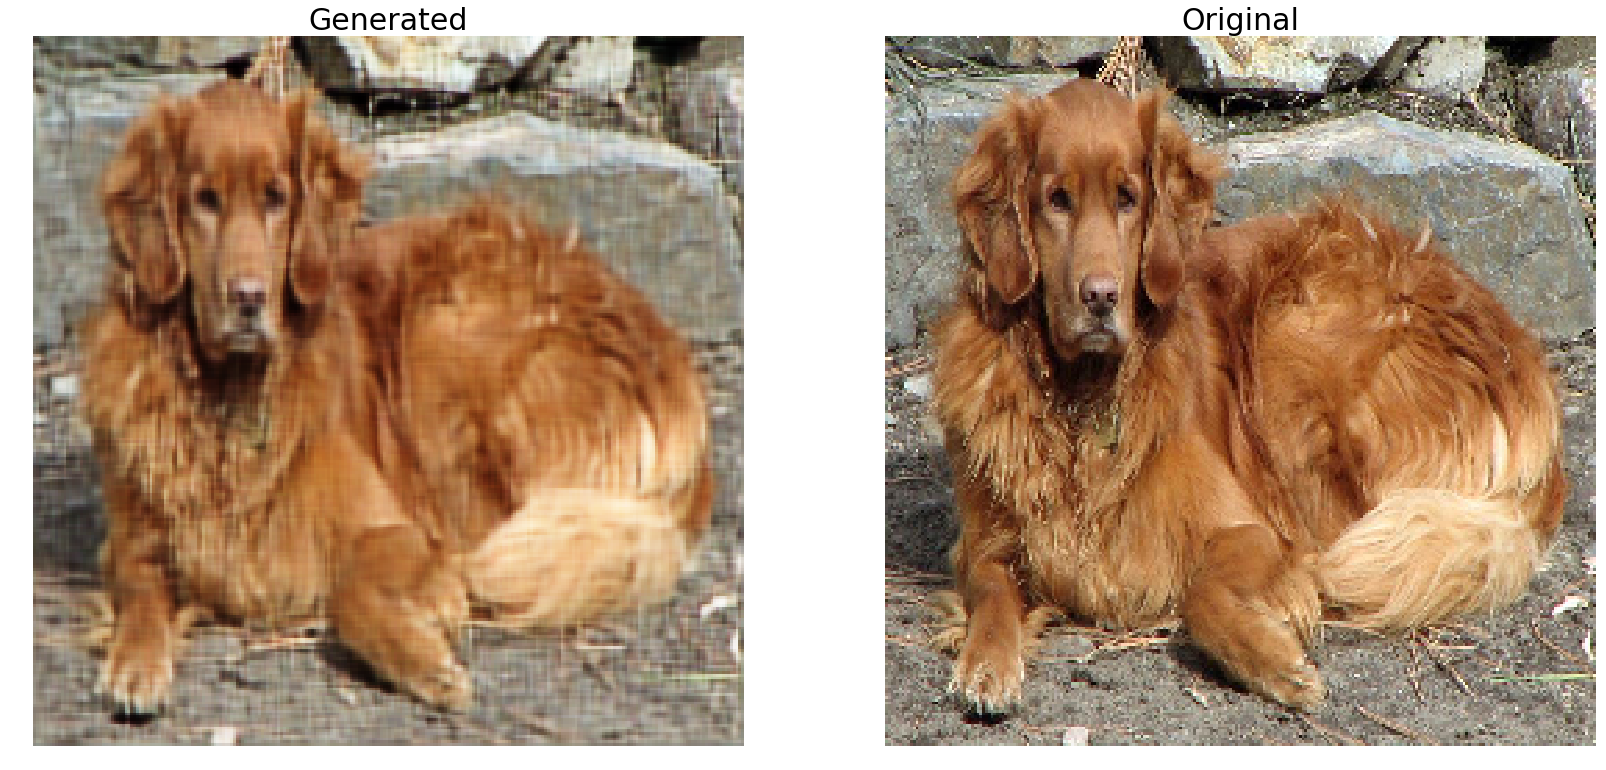

Epoch 1/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6015

Epoch 2/2000
1/1 [==============================]1/1 [==============================] - 0s 66ms/step - loss: 0.6014

Epoch 3/2000
1/1 [==============================]1/1 [==============================] - 0s 66ms/step - loss: 0.6015

Epoch 4/2000
1/1 [==============================]1/1 [==============================] - 0s 68ms/step - loss: 0.6013

Epoch 5/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6014

Epoch 6/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6012

Epoch 7/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6012

Epoch 8/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6012

Epoch 9/2000
1/1 [==============================]1/1 [==========


Epoch 71/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6013

Epoch 72/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6015

Epoch 73/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6013

Epoch 74/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6014

Epoch 75/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6012

Epoch 76/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6012

Epoch 77/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6012

Epoch 78/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6012

Epoch 79/2000
1/1 [==============================]1/1 [

1/1 [==============================]1/1 [==============================] - 0s 67ms/step - loss: 0.6011

Epoch 141/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6012

Epoch 142/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6011

Epoch 143/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6012

Epoch 144/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6010

Epoch 145/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6011

Epoch 146/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6010

Epoch 147/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6011

Epoch 148/2000
1/1 [==============================]1/1 [=======


Epoch 209/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6011

Epoch 210/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6010

Epoch 211/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6012

Epoch 212/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6011

Epoch 213/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6012

Epoch 214/2000
1/1 [==============================]1/1 [==============================] - 0s 66ms/step - loss: 0.6012

Epoch 215/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6012

Epoch 216/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6011

Epoch 217/2000
1/1 [===========================


Epoch 278/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6008

Epoch 279/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6008

Epoch 280/2000
1/1 [==============================]1/1 [==============================] - 0s 78ms/step - loss: 0.6008

Epoch 281/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6008

Epoch 282/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6008

Epoch 283/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6008

Epoch 284/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6007

Epoch 285/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6007

Epoch 286/2000
1/1 [===========================


Epoch 347/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6008

Epoch 348/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6009

Epoch 349/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6009

Epoch 350/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6009

Epoch 351/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6009

Epoch 352/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6009

Epoch 353/2000
1/1 [==============================]1/1 [==============================] - 0s 79ms/step - loss: 0.6008

Epoch 354/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6009

Epoch 355/2000
1/1 [===========================


Epoch 416/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6007

Epoch 417/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6006

Epoch 418/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6007

Epoch 419/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6006

Epoch 420/2000
1/1 [==============================]1/1 [==============================] - 0s 68ms/step - loss: 0.6007

Epoch 421/2000
1/1 [==============================]1/1 [==============================] - 0s 77ms/step - loss: 0.6006

Epoch 422/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6006

Epoch 423/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6006

Epoch 424/2000
1/1 [===========================


Epoch 485/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6005

Epoch 486/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6005

Epoch 487/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6004

Epoch 488/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6004

Epoch 489/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6005

Epoch 490/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6005

Epoch 491/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6006

Epoch 492/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6005

Epoch 493/2000
1/1 [===========================


Epoch 554/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6002

Epoch 555/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6002

Epoch 556/2000
1/1 [==============================]1/1 [==============================] - 0s 68ms/step - loss: 0.6002

Epoch 557/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6002

Epoch 558/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6002

Epoch 559/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6002

Epoch 560/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6003

Epoch 561/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6003

Epoch 562/2000
1/1 [===========================


Epoch 623/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6004

Epoch 624/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6003

Epoch 625/2000
1/1 [==============================]1/1 [==============================] - 0s 81ms/step - loss: 0.6004

Epoch 626/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6003

Epoch 627/2000
1/1 [==============================]1/1 [==============================] - 0s 68ms/step - loss: 0.6004

Epoch 628/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6003

Epoch 629/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6003

Epoch 630/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6003

Epoch 631/2000
1/1 [===========================


Epoch 692/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6002

Epoch 693/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6002

Epoch 694/2000
1/1 [==============================]1/1 [==============================] - 0s 68ms/step - loss: 0.6002

Epoch 695/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6002

Epoch 696/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6002

Epoch 697/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6002

Epoch 698/2000
1/1 [==============================]1/1 [==============================] - 0s 67ms/step - loss: 0.6002

Epoch 699/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6003

Epoch 700/2000
1/1 [===========================


Epoch 761/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6002

Epoch 762/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6002

Epoch 763/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6002

Epoch 764/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6002

Epoch 765/2000
1/1 [==============================]1/1 [==============================] - 0s 68ms/step - loss: 0.6001

Epoch 766/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.6002

Epoch 767/2000
1/1 [==============================]1/1 [==============================] - 0s 78ms/step - loss: 0.6001

Epoch 768/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6001

Epoch 769/2000
1/1 [===========================


Epoch 830/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.6000

Epoch 831/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6000

Epoch 832/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.6000

Epoch 833/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.6001

Epoch 834/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6001

Epoch 835/2000
1/1 [==============================]1/1 [==============================] - 0s 78ms/step - loss: 0.6002

Epoch 836/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.6003

Epoch 837/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.6002

Epoch 838/2000
1/1 [===========================


Epoch 899/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5999

Epoch 900/2000
1/1 [==============================]1/1 [==============================] - 0s 80ms/step - loss: 0.5999

Epoch 901/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5999

Epoch 902/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.5999

Epoch 903/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.5999

Epoch 904/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5999

Epoch 905/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5999

Epoch 906/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.5999

Epoch 907/2000
1/1 [===========================


Epoch 968/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.5998

Epoch 969/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.5999

Epoch 970/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5998

Epoch 971/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.5999

Epoch 972/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.5999

Epoch 973/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5999

Epoch 974/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.5999

Epoch 975/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5999

Epoch 976/2000
1/1 [===========================


Epoch 1037/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5998

Epoch 1038/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.5998

Epoch 1039/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.5998

Epoch 1040/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5998

Epoch 1041/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.5998

Epoch 1042/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.5997

Epoch 1043/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5998

Epoch 1044/2000
1/1 [==============================]1/1 [==============================] - 0s 75ms/step - loss: 0.5997

Epoch 1045/2000
1/1 [==================


Epoch 1106/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5998

Epoch 1107/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.5997

Epoch 1108/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.5998

Epoch 1109/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5997

Epoch 1110/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.5997

Epoch 1111/2000
1/1 [==============================]1/1 [==============================] - 0s 78ms/step - loss: 0.5996

Epoch 1112/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5996

Epoch 1113/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.5995

Epoch 1114/2000
1/1 [==================


Epoch 1175/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5997

Epoch 1176/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.5998

Epoch 1177/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.5997

Epoch 1178/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.5998

Epoch 1179/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.5996

Epoch 1180/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.5997

Epoch 1181/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5996

Epoch 1182/2000
1/1 [==============================]1/1 [==============================] - 0s 67ms/step - loss: 0.5997

Epoch 1183/2000
1/1 [==================


Epoch 1244/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.5995

Epoch 1245/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5995

Epoch 1246/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.5995

Epoch 1247/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.5995

Epoch 1248/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5995

Epoch 1249/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5995

Epoch 1250/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5995

Epoch 1251/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5994

Epoch 1252/2000
1/1 [==================


Epoch 1313/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5993

Epoch 1314/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5993

Epoch 1315/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5993

Epoch 1316/2000
1/1 [==============================]1/1 [==============================] - 0s 67ms/step - loss: 0.5993

Epoch 1317/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5993

Epoch 1318/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5993

Epoch 1319/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.5992

Epoch 1320/2000
1/1 [==============================]1/1 [==============================] - 0s 75ms/step - loss: 0.5993

Epoch 1321/2000
1/1 [==================


Epoch 1382/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.5992

Epoch 1383/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.5991

Epoch 1384/2000
1/1 [==============================]1/1 [==============================] - 0s 79ms/step - loss: 0.5991

Epoch 1385/2000
1/1 [==============================]1/1 [==============================] - 0s 68ms/step - loss: 0.5991

Epoch 1386/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5992

Epoch 1387/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.5992

Epoch 1388/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5992

Epoch 1389/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5993

Epoch 1390/2000
1/1 [==================


Epoch 1451/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.5992

Epoch 1452/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5991

Epoch 1453/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5992

Epoch 1454/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.5991

Epoch 1455/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.5992

Epoch 1456/2000
1/1 [==============================]1/1 [==============================] - 0s 68ms/step - loss: 0.5991

Epoch 1457/2000
1/1 [==============================]1/1 [==============================] - 0s 76ms/step - loss: 0.5992

Epoch 1458/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5992

Epoch 1459/2000
1/1 [==================


Epoch 1520/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5991

Epoch 1521/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5992

Epoch 1522/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5991

Epoch 1523/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.5991

Epoch 1524/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.5990

Epoch 1525/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5990

Epoch 1526/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5990

Epoch 1527/2000
1/1 [==============================]1/1 [==============================] - 0s 76ms/step - loss: 0.5990

Epoch 1528/2000
1/1 [==================


Epoch 1589/2000
1/1 [==============================]1/1 [==============================] - 0s 77ms/step - loss: 0.5992

Epoch 1590/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5992

Epoch 1591/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5992

Epoch 1592/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.5991

Epoch 1593/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.5992

Epoch 1594/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5990

Epoch 1595/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.5991

Epoch 1596/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5990

Epoch 1597/2000
1/1 [==================


Epoch 1658/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5989

Epoch 1659/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.5989

Epoch 1660/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.5989

Epoch 1661/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5989

Epoch 1662/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5989

Epoch 1663/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.5989

Epoch 1664/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5989

Epoch 1665/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.5989

Epoch 1666/2000
1/1 [==================


Epoch 1727/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.5990

Epoch 1728/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.5989

Epoch 1729/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5989

Epoch 1730/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5988

Epoch 1731/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5988

Epoch 1732/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.5987

Epoch 1733/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.5988

Epoch 1734/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5988

Epoch 1735/2000
1/1 [==================


Epoch 1796/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.5987

Epoch 1797/2000
1/1 [==============================]1/1 [==============================] - 0s 77ms/step - loss: 0.5987

Epoch 1798/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5987

Epoch 1799/2000
1/1 [==============================]1/1 [==============================] - 0s 74ms/step - loss: 0.5987

Epoch 1800/2000
1/1 [==============================]1/1 [==============================] - 0s 77ms/step - loss: 0.5987

Epoch 1801/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5988

Epoch 1802/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5987

Epoch 1803/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.5987

Epoch 1804/2000
1/1 [==================


Epoch 1865/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5987

Epoch 1866/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5987

Epoch 1867/2000
1/1 [==============================]1/1 [==============================] - 0s 73ms/step - loss: 0.5987

Epoch 1868/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.5987

Epoch 1869/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5988

Epoch 1870/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5987

Epoch 1871/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.5988

Epoch 1872/2000
1/1 [==============================]1/1 [==============================] - 0s 70ms/step - loss: 0.5987

Epoch 1873/2000
1/1 [==================


Epoch 1934/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5986

Epoch 1935/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5986

Epoch 1936/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5985

Epoch 1937/2000
1/1 [==============================]1/1 [==============================] - 0s 71ms/step - loss: 0.5985

Epoch 1938/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5985

Epoch 1939/2000
1/1 [==============================]1/1 [==============================] - 0s 77ms/step - loss: 0.5985

Epoch 1940/2000
1/1 [==============================]1/1 [==============================] - 0s 69ms/step - loss: 0.5985

Epoch 1941/2000
1/1 [==============================]1/1 [==============================] - 0s 72ms/step - loss: 0.5985

Epoch 1942/2000
1/1 [==================

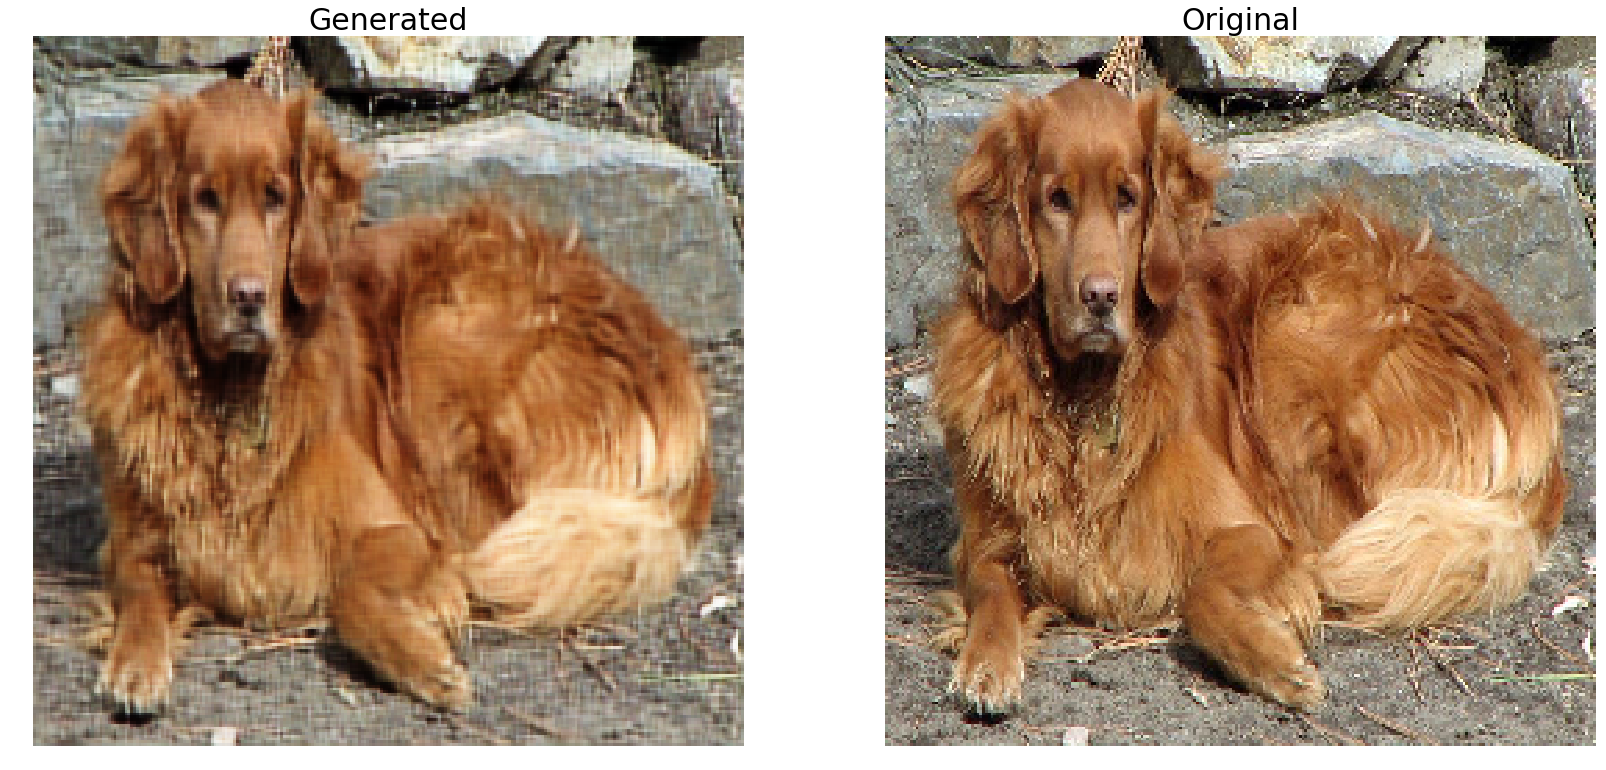

In [21]:
# TensorBoard = tf.keras.callbacks.TensorBoard

# 1 10 50 100 500 1000 2000 4000 6000
c = 0
for i in [1, 9, 40, 50, 400, 500, 1000, 2000, 2000]:
    autoencoder.fit(np.array(f), 
                    images,
                    epochs=i,
                    batch_size=30,
                    shuffle=True,
                   )
                    #validation_data=(x_test, x_test),
                    #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
    c += i
    show_image(0, f, images, save="plots/epochs/train_{}_epoch.png".format(c))

In [20]:
def show_image(image_n, f, images, save=""):
    decoded_img = autoencoder.predict(np.array([f[image_n]]))
    plt.figure(figsize=(28, 28))
    plt.subplot(1, 2, 1)
    plt.imshow(decoded_img.reshape(size, size, 3))
    plt.title('Generated', fontsize=30)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    #plt.imshow(image.load_img(image_path[image_n], target_size=(size, size)))
    plt.imshow(images[image_n])
    plt.title('Original', fontsize=30)
    plt.axis('off')
    #plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()

In [ ]:
for i in range(10):
    show_image(i, f, images, save="plots/10000/train_{}.png".format(i))

In [ ]:
for i in range(10):
    show_image(i, test_f, test_images, save="plots/10000/test_{}.png".format(i))

In [ ]:
decoded_img = autoencoder.predict(np.random.normal(0, 1, size=[1, 2048]))
plt.figure(figsize=(28, 28))
plt.subplot(1, 2, 1)
plt.imshow(decoded_img.reshape(size, size, 3))
plt.title('Generated', fontsize=30)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(small_out)
plt.title('Original', fontsize=30)
plt.axis('off')
#plt.tight_layout()
plt.savefig("tst.png")
plt.show()

In [ ]:
autoencoder.save('10000.model')